Yixin Ye - m207026
17APR20

SI486L: Machine Learning and Data Science

---

<div style="text-align:center">

# Project 7
---------------
## Neural Network Regression
---------
</div>


The purpose of this project is to use Neural Network Regression to learn more about the COVID-19 dataset and how health data relate to it.

There are many features in this dataset and we will use ablatian test to find out which has the greatest impact on the performance of the neural network.

Index:
- `covid19.py`: where the main training of the neural network is done
- `ablation.py`: each column is taken out of the dataset and compared with the original dataset
- `covid_model.pickle`: the best model is saved here
- `predict.py`: given a new datapoint, to predict the D+14 log cases and deaths
- `sample.txt`: a new datapoint for predicting the D+14 log cases and deaths

### Preprocessing

Reference: `covid.py`

__Simple string operations__<br>
Some of the ratios have trailing ':0's that would run into problems when converting it to a float.<br> 
Some of the population numbers have some notes in parenthesis and they have to be cleaned up.

__Date__<br>
I decided to split the date into two columns, date and month.

__NaN Issues__<br>
There are some missing values which became 'nan' values in the input array. I didn't realize for a while that this was the reason I was getting 'nan's for my training and test losses.
To address this, I replaced the 'nan' values with the mean value for that column.<br>
`means = data.mean()
for col in data.columns:
data[col]=data[col].fillna(means[col])`

__Normalization__<br>
Normalizing the input data really helped drive down the losses I was getting.
`x=preprocessing.scale(data.values[:,:-2])`

__Adding Gaussian Noise__<br>
I attempted add adding Gaussian noise to the input array.

`noise = np.random.normal(0, 0.1, [x.shape[0],x.shape[1]])
x = x + noise`

However, my neural network performed worse (trained slower and had higher test/train loss) with the added noise so I decided to take it out.

### Neural Network Design
__Increased Width and Depth__<br>
Instead of 100 neurons in each hidden layer, I've increased it too 1000 to improve the performance of the neural network.
I've also inserted more layers to increase its depth from the example.

__Choice of Activation Function__<br>
I was tinkering with this because I was getting 'nan's for my training and test loss.
I found out about LeakyReLU and PReLU which can help to prevent gradient explosions.
Through experimentation, I found PReLU to perform the best and most consistently with the dataset.
`torch.nn.PReLU()`

__Gradient Clipping__
This also helps with preventing gradient explosion.
I also found that the model oscillates from optimal to near optimal states with gradient clipping instead of returning to a poorer model when without.

`torch.nn.utils.clip_grad_norm_(model.parameters(), .25)
for p in model.parameters():
    p.data.add_(-learning_rate, p.grad.data)`
    
### Hyperparamters

__Learning Rate__
I experimented with changing the learning rates of 1e-2, 1e-3 and 1e-4 A learning rate of 0.001 worked the best, training the quickest and producing the lowest training and test losses.

__Epochs__
The number of max epochs didn't really matter as early-stopping was implemented to stop when the test loss does not improve after 1000 epochs.

With these features and hyperparameters, I was able to reduce the test loss down to 457.5460510253906.

### Ablation Test
To get an idea of which features work best, I removed each column from the input to see how their performance compare against the full dataset.

As shown in the bar plot below, the 'date' and 'days under stay at home orders' have the greatest negative impact on the model's performance when taken out.
However, as the number of cases and deaths were increasing with each day anyway, this didn't mean much.

The health statistics that made the most impact are interestingly:
1. % Flu Vaccinated
2. % Some College
3. % Driving Deaths with Alcohol Involvement

The list goes on.

### Prediction
I was not able to get this part of the code to work as I was not too familiar with switching between using the cpu and gpu, as the error messages would suggest.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [51]:
cols = []
vals = []

for line in lines[:-2]:
    comp = line.split(': ')[1].split()
    vals.append(float(comp[0]) - 457.5460510253906)
    col = ' '.join(comp[1:])
    cols.append(col)

<BarContainer object of 46 artists>

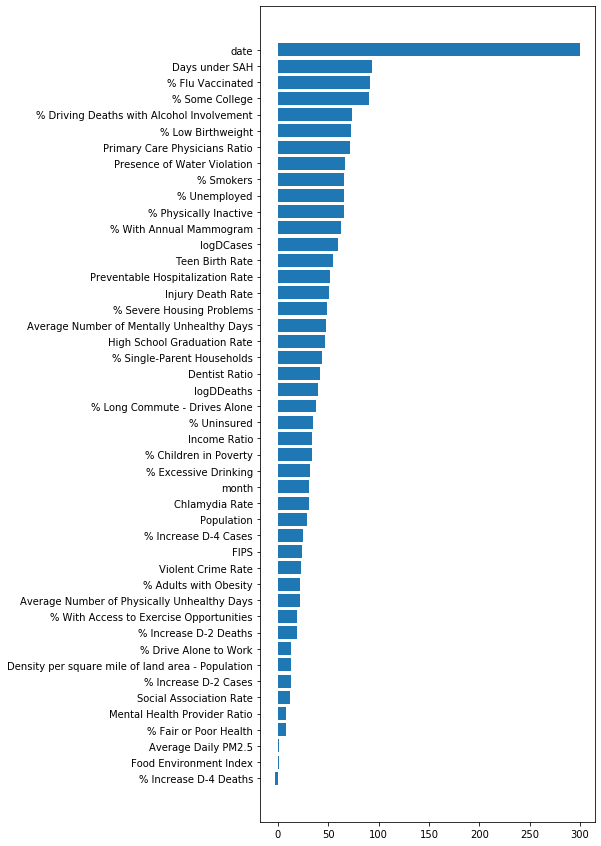

In [52]:
tups = zip(cols,vals)

ordered_c = []
ordered_v = []
for s,p in sorted(tups,key=lambda x:x[1]):
    ordered_c.append(s)
    ordered_v.append(p)

plt.figure(figsize=(6, 15))
plt.barh(ordered_c,ordered_v)